## Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import NearestNeighbors
import math
import seaborn as sn

In [2]:
import random
from scipy import ndarray

In [3]:
%config InlineBackend.figure_format = 'svg'

In [4]:
palette = ['paleturquoise','c']

## Import dataset

In [5]:
from collections import Counter
from imblearn.datasets import fetch_datasets
data = fetch_datasets()['wine_quality']

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [6]:
data.data.shape

(4898, 11)

In [7]:
len(data.data)

4898

In [8]:
def unison_shuffled_copies(a, b):
    np.random.seed(3)##change seed 1,2,3,4,5
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [9]:
data.data,data.target=unison_shuffled_copies(data.data, data.target)

## Initializing Results list

## Creating label and feature matrices

In [10]:
labels=data.target
print(np.unique(labels, return_counts = 1))

(array([-1,  1], dtype=int64), array([4715,  183], dtype=int64))


In [11]:
features=data.data
features.shape

(4898, 11)

In [12]:
n_feat=len(features[1])

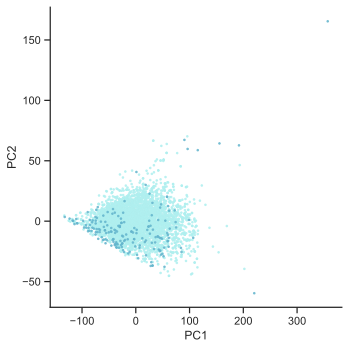

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
pc = pca.fit_transform(features)
result_baseline = pd.DataFrame(data = pc , 
        columns = ['PC1','PC2'])
result_baseline['Cluster'] = labels


sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(12,10)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})


g_baseline=sns.lmplot( x="PC1", y="PC2",
  data=result_baseline, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=False,
  scatter_kws={"s": 3}, palette= sns.color_palette(palette) ) # specify the point size


plt.grid(False)
plt.show()

## Dividing data into training and testing datasets

In [14]:
label_1=np.where(labels == 1)[0]
label_1=list(label_1)
len(label_1)

183

In [15]:
features_1=features[label_1]
features_1=np.take(features_1,np.random.permutation(features_1.shape[0]),axis=0,out=features_1)

In [16]:
label_0=np.where(labels == -1)[0]
label_0=list(label_0)
len(label_0)

4715

In [17]:
features_0=features[label_0]
features_0=np.take(features_0,np.random.permutation(features_0.shape[0]),axis=0,out=features_0)

In [18]:
a=len(features_1)//10
b=len(features_0)//10

In [19]:
fold_1_min=features_1[0:a]
fold_1_maj=features_0[0:b]
fold_1_tst=np.concatenate((fold_1_min,fold_1_maj))
lab_1_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [20]:
fold_2_min=features_1[a:2*a]
fold_2_maj=features_0[b:2*b]
fold_2_tst=np.concatenate((fold_2_min,fold_2_maj))
lab_2_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [21]:
fold_3_min=features_1[2*a:3*a]
fold_3_maj=features_0[2*b:3*b]
fold_3_tst=np.concatenate((fold_3_min,fold_3_maj))
lab_3_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [22]:
fold_4_min=features_1[3*a:4*a]
fold_4_maj=features_0[3*b:4*b]
fold_4_tst=np.concatenate((fold_4_min,fold_4_maj))
lab_4_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [23]:
fold_5_min=features_1[4*a:5*a]
fold_5_maj=features_0[4*b:5*b]
fold_5_tst=np.concatenate((fold_5_min,fold_5_maj))
lab_5_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [24]:
fold_6_min=features_1[5*a:6*a]
fold_6_maj=features_0[5*b:6*b]
fold_6_tst=np.concatenate((fold_6_min,fold_6_maj))
lab_6_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [25]:
fold_7_min=features_1[6*a:7*a]
fold_7_maj=features_0[6*b:7*b]
fold_7_tst=np.concatenate((fold_7_min,fold_7_maj))
lab_7_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [26]:
fold_8_min=features_1[7*a:8*a]
fold_8_maj=features_0[7*b:8*b]
fold_8_tst=np.concatenate((fold_8_min,fold_8_maj))
lab_8_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [27]:
fold_9_min=features_1[8*a:9*a]
fold_9_maj=features_0[8*b:9*b]
fold_9_tst=np.concatenate((fold_9_min,fold_9_maj))
lab_9_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [28]:
fold_10_min=features_1[9*a:]
fold_10_maj=features_0[9*b:]
fold_10_tst=np.concatenate((fold_10_min,fold_10_maj))
lab_10_tst=np.concatenate((np.zeros(len(fold_10_min))+1, np.zeros(len(fold_10_maj))))

In [29]:
fold_1_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [30]:
lab_1_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [31]:
fold_2_trn=np.concatenate((fold_1_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_1_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [32]:
lab_2_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [33]:
fold_3_trn=np.concatenate((fold_2_min,fold_1_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_1_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [34]:
lab_3_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [35]:
fold_4_trn=np.concatenate((fold_2_min,fold_3_min,fold_1_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_1_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [36]:
lab_4_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [37]:
fold_5_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_1_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_1_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [38]:
lab_5_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [39]:
fold_6_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_1_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_1_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [40]:
lab_6_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [41]:
fold_7_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_1_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_1_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [42]:
lab_7_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [43]:
fold_8_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_1_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_1_maj,fold_9_maj,fold_10_maj))

In [44]:
lab_8_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [45]:
fold_9_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_1_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_1_maj,fold_10_maj))

In [46]:
lab_9_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [47]:
fold_10_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_1_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_1_maj))

In [48]:
lab_10_trn=np.concatenate((np.zeros(9*a)+1,np.zeros(9*b)))


In [49]:
training_folds_feats=[fold_1_trn,fold_2_trn,fold_3_trn,fold_4_trn,fold_5_trn,fold_6_trn,fold_7_trn,fold_8_trn,fold_9_trn,fold_10_trn]

In [50]:
testing_folds_feats=[fold_1_tst,fold_2_tst,fold_3_tst,fold_4_tst,fold_5_tst,fold_6_tst,fold_7_tst,fold_8_tst,fold_9_tst,fold_10_tst]

In [51]:
training_folds_labels=[lab_1_trn,lab_2_trn,lab_3_trn,lab_4_trn,lab_5_trn,lab_6_trn,lab_7_trn,lab_8_trn,lab_9_trn,lab_10_trn]

In [52]:
testing_folds_labels=[lab_1_tst,lab_2_tst,lab_3_tst,lab_4_tst,lab_5_tst,lab_6_tst,lab_7_tst,lab_8_tst,lab_9_tst,lab_10_tst]

In [53]:
def lr(X_train,y_train,X_test,y_test):
    from sklearn import metrics
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', class_weight={0: 1, 1: 1})
    logreg.fit(X_train, y_train)
    y_pred= logreg.predict(X_test)
    y_proba=logreg.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    aps=average_precision_score(y_test,y_proba)
    print('balanced accuracy_LR:', bal_acc)
    print('f1 score_LR:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_LR',con_mat)
    return(f1, bal_acc, aps, con_mat)

In [54]:
def svm(X_train,y_train,X_test,y_test):
    from sklearn import preprocessing
    from sklearn import metrics
    from sklearn import svm
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)
    svm= svm.SVC(kernel='linear', decision_function_shape='ovo', class_weight={0: 1., 1: 1.},probability=True)
    svm.fit(X_train, y_train)
    y_pred= svm.predict(X_test)
    y_proba=svm.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    aps=average_precision_score(y_test,y_proba)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    print('balanced accuracy_SVM:', bal_acc)
    print('f1 score_SVM:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_SVM',con_mat)
    return( f1, bal_acc , aps, con_mat)

In [55]:
def knn(X_train,y_train,X_test,y_test):
    from sklearn import metrics
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train, y_train)
    y_pred= knn.predict(X_test)
    y_proba=knn.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    aps=average_precision_score(y_test,y_proba)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    print('balanced accuracy_KNN:', bal_acc)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    print('f1 score_KNN:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_KNN',con_mat)
    return(f1, bal_acc, aps, con_mat)

In [56]:
def Neb_grps(data,near_neb):
    nbrs = NearestNeighbors(n_neighbors=near_neb, algorithm='ball_tree').fit(data)
    distances, indices = nbrs.kneighbors(data)
    neb_class=[]
    for i in (indices):
        neb_class.append(i)
    return(np.asarray(neb_class)) 

def LoRAS(data,num_samples,shadow,sigma,num_RACOS,num_afcomb):
    np.random.seed(42)
    data_shadow=([])
    for i in range (num_samples):
        c=0
        while c<shadow:
            data_shadow.append(data[i]+np.random.normal(0,sigma))
            c=c+1
    data_shadow==np.asarray(data_shadow)
    data_shadow_lc=([])
    for i in range(num_RACOS):
        idx = np.random.randint(shadow*num_samples, size=num_afcomb)
        w=np.random.randint(100, size=len(idx))
        aff_w=np.asarray(w/sum(w))
        data_tsl=np.array(data_shadow)[idx,:]
        data_tsl_=np.dot(aff_w, data_tsl)
        data_shadow_lc.append(data_tsl_)
    return(np.asarray(data_shadow_lc))   

def LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb):
    RACOS_set=[]
    for i in range (len(nb_list)):
        RACOS_i= LoRAS(features_1_trn[nb_list[i]],num_samples,shadow,sigma,num_RACOS,num_afcomb)
        RACOS_set.append(RACOS_i)
    LoRAS_set=np.asarray(RACOS_set)
    LoRAS_1=np.reshape(LoRAS_set,(len(features_1_trn)*num_RACOS,n_feat))
    return(np.concatenate((LoRAS_1,features_1_trn)))

In [57]:
LR_tLoRAS=[]
SVM_tLoRAS=[]
KNN_tLoRAS=[]
import umap.umap_ as umap
for i in range(10):
    
    features = training_folds_feats[i]
    labels= training_folds_labels[i]
    label_1=np.where(labels == 1)[0]
    label_1=list(label_1)
    features_1_trn=features[label_1]
    
    label_0=np.where(labels == 0)[0]
    label_0=list(label_0)
    features_0_trn=features[label_0]
    
    data_embedded_min = umap.UMAP(n_neighbors=5, min_dist=0.00000001, n_components=2, metric='euclidean', random_state=11).fit_transform(features_1_trn)
    result_min= pd.DataFrame(data = data_embedded_min, columns = ['UMAP0', 'UMAP1'])
    min_t=np.asmatrix(result_min)
    min_t=min_t[0:len(features_1_trn)]
    min_t=min_t[:, [0,1]]
    
    num_samples=30
    shadow=100
    sigma=.005
    num_RACOS=(len(features_0_trn)-len(features_1_trn))//len(features_1_trn)
    num_afcomb=3
    nb_list=Neb_grps(min_t, num_samples)
    
    LoRAS_1=LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb)
    LoRAS_train=np.concatenate((LoRAS_1,features_0_trn))
    LoRAS_labels=np.concatenate((np.zeros(len(LoRAS_1))+1, np.zeros(len(features_0_trn))))
    
    f1_lr_LoRAS,bal_acc_lr_LoRAS, aps_lr_LoRAS,mat_lr_LoRAS=lr(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_tLoRAS.append([f1_lr_LoRAS,bal_acc_lr_LoRAS,aps_lr_LoRAS])
    f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS,mat_svm_LoRAS=svm(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    SVM_tLoRAS.append([f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS])
    f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS,mat_knn_LoRAS=knn(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    KNN_tLoRAS.append([f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS])    

C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 367 104 5 13
balanced accuracy_LR: 0.7507077140835103
f1 score_LR: 0.1925925925925926
kappa: 0.13756613756613756
average_precision_score: 0.3706787743989731
confusion matrix_LR [[367 104]
 [  5  13]]
tn, fp, fn, tp: 253 218 1 17
balanced accuracy_SVM: 0.7407997169143665
f1 score_SVM: 0.1343873517786561
kappa: 0.07085036049871163
average_precision_score: 0.3402035313526032
confusion matrix_SVM [[253 218]
 [  1  17]]
tn, fp, fn, tp: 360 111 6 12
balanced accuracy_KNN: 0.7154989384288748
f1 score_KNN: 0.1702127659574468
kappa: 0.1132654484586414
average_precision_score: 0.17693903286755908
confusion matrix_KNN [[360 111]
 [  6  12]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 371 100 6 12
balanced accuracy_LR: 0.727176220806794
f1 score_LR: 0.18461538461538463
kappa: 0.12939635190970467
average_precision_score: 0.1483402044146309
confusion matrix_LR [[371 100]
 [  6  12]]
tn, fp, fn, tp: 269 202 3 15
balanced accuracy_SVM: 0.7022292993630573
f1 score_SVM: 0.12765957446808512
kappa: 0.06403181983697948
average_precision_score: 0.14715286431414412
confusion matrix_SVM [[269 202]
 [  3  15]]
tn, fp, fn, tp: 381 90 7 11
balanced accuracy_KNN: 0.7100141542816703
f1 score_KNN: 0.18487394957983194
kappa: 0.13054715424800667
average_precision_score: 0.12415873125670306
confusion matrix_KNN [[381  90]
 [  7  11]]


C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 352 119 3 15
balanced accuracy_LR: 0.7903397027600849
f1 score_LR: 0.19736842105263158
kappa: 0.14166091160220984
average_precision_score: 0.23148387167450116
confusion matrix_LR [[352 119]
 [  3  15]]
tn, fp, fn, tp: 252 219 1 17
balanced accuracy_SVM: 0.7397381457891012
f1 score_SVM: 0.13385826771653545
kappa: 0.0702618615504278
average_precision_score: 0.21591990219152943
confusion matrix_SVM [[252 219]
 [  1  17]]
tn, fp, fn, tp: 363 108 10 8
balanced accuracy_KNN: 0.6075725406935598
f1 score_KNN: 0.11940298507462686
kappa: 0.05946210268948671
average_precision_score: 0.08322157017096919
confusion matrix_KNN [[363 108]
 [ 10   8]]


C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 366 105 6 12
balanced accuracy_LR: 0.7218683651804672
f1 score_LR: 0.17777777777777778
kappa: 0.1217416630260666
average_precision_score: 0.23087513422541805
confusion matrix_LR [[366 105]
 [  6  12]]
tn, fp, fn, tp: 248 223 3 15
balanced accuracy_SVM: 0.6799363057324841
f1 score_SVM: 0.1171875
kappa: 0.05232558139534882
average_precision_score: 0.23285870501669223
confusion matrix_SVM [[248 223]
 [  3  15]]
tn, fp, fn, tp: 346 125 10 8
balanced accuracy_KNN: 0.5895258315640481
f1 score_KNN: 0.10596026490066225
kappa: 0.04396750228092283
average_precision_score: 0.1014275297440981
confusion matrix_KNN [[346 125]
 [ 10   8]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 361 110 4 14
balanced accuracy_LR: 0.7721160651096957
f1 score_LR: 0.19718309859154928
kappa: 0.14202604118570505
average_precision_score: 0.39085488324421025
confusion matrix_LR [[361 110]
 [  4  14]]
tn, fp, fn, tp: 250 221 2 16
balanced accuracy_SVM: 0.7098372257607926
f1 score_SVM: 0.12549019607843137
kappa: 0.0612587484827356
average_precision_score: 0.40719875302059677
confusion matrix_SVM [[250 221]
 [  2  16]]
tn, fp, fn, tp: 377 94 6 12
balanced accuracy_KNN: 0.7335456475583864
f1 score_KNN: 0.1935483870967742
kappa: 0.13938753959873296
average_precision_score: 0.08710554022671897
confusion matrix_KNN [[377  94]
 [  6  12]]


C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 365 106 12 6
balanced accuracy_LR: 0.554140127388535
f1 score_LR: 0.09230769230769231
kappa: 0.030837448352312724
average_precision_score: 0.14003496886107292
confusion matrix_LR [[365 106]
 [ 12   6]]
tn, fp, fn, tp: 260 211 5 13
balanced accuracy_SVM: 0.6371196036801132
f1 score_SVM: 0.10743801652892562
kappa: 0.0421676913869089
average_precision_score: 0.15473141899661252
confusion matrix_SVM [[260 211]
 [  5  13]]
tn, fp, fn, tp: 352 119 9 9
balanced accuracy_KNN: 0.6236730360934182
f1 score_KNN: 0.1232876712328767
kappa: 0.06279759230976545
average_precision_score: 0.13372975283641453
confusion matrix_KNN [[352 119]
 [  9   9]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 369 102 9 9
balanced accuracy_LR: 0.64171974522293
f1 score_LR: 0.13953488372093023
kappa: 0.08134044173648147
average_precision_score: 0.14378378887802562
confusion matrix_LR [[369 102]
 [  9   9]]
tn, fp, fn, tp: 257 214 7 11
balanced accuracy_SVM: 0.5783793347487616
f1 score_SVM: 0.09053497942386833
kappa: 0.02400498523395389
average_precision_score: 0.1272673283926125
confusion matrix_SVM [[257 214]
 [  7  11]]
tn, fp, fn, tp: 370 101 11 7
balanced accuracy_KNN: 0.5872257607926398
f1 score_KNN: 0.1111111111111111
kappa: 0.05124207462841701
average_precision_score: 0.08116258378194
confusion matrix_KNN [[370 101]
 [ 11   7]]


C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 356 115 8 10
balanced accuracy_LR: 0.6556970983722576
f1 score_LR: 0.13986013986013987
kappa: 0.08070062818102619
average_precision_score: 0.17485315362494094
confusion matrix_LR [[356 115]
 [  8  10]]
tn, fp, fn, tp: 262 209 4 14
balanced accuracy_SVM: 0.6670205237084218
f1 score_SVM: 0.11618257261410789
kappa: 0.05157483541399188
average_precision_score: 0.18208371333953943
confusion matrix_SVM [[262 209]
 [  4  14]]
tn, fp, fn, tp: 356 115 9 9
balanced accuracy_KNN: 0.6279193205944799
f1 score_KNN: 0.1267605633802817
kappa: 0.06676516760550377
average_precision_score: 0.0821403983107768
confusion matrix_KNN [[356 115]
 [  9   9]]


C:\Users\admin\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 373 98 7 11
balanced accuracy_LR: 0.7015215852795471
f1 score_LR: 0.1732283464566929
kappa: 0.11746506471407214
average_precision_score: 0.3270383581758115
confusion matrix_LR [[373  98]
 [  7  11]]
tn, fp, fn, tp: 262 209 3 15
balanced accuracy_SVM: 0.6947983014861996
f1 score_SVM: 0.12396694214876033
kappa: 0.059905326731595765
average_precision_score: 0.3266966437180297
confusion matrix_SVM [[262 209]
 [  3  15]]
tn, fp, fn, tp: 357 114 6 12
balanced accuracy_KNN: 0.7123142250530785
f1 score_KNN: 0.16666666666666666
kappa: 0.1092896174863387
average_precision_score: 0.20988063873115637
confusion matrix_KNN [[357 114]
 [  6  12]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 382 94 8 13
balanced accuracy_LR: 0.7107843137254902
f1 score_LR: 0.203125
kappa: 0.14255268766279905
average_precision_score: 0.24354525978221542
confusion matrix_LR [[382  94]
 [  8  13]]
tn, fp, fn, tp: 275 201 2 19
balanced accuracy_SVM: 0.7412464985994398
f1 score_SVM: 0.15767634854771787
kappa: 0.0872648977265531
average_precision_score: 0.2754227348307711
confusion matrix_SVM [[275 201]
 [  2  19]]
tn, fp, fn, tp: 375 101 11 10
balanced accuracy_KNN: 0.6320028011204482
f1 score_KNN: 0.15151515151515152
kappa: 0.08660693774408468
average_precision_score: 0.08506750299125586
confusion matrix_KNN [[375 101]
 [ 11  10]]


In [58]:
def stats(arr):
    x=np.mean(np.asarray(arr), axis = 0)
    y=np.std(np.asarray(arr), axis = 0)
    return(x,y)

In [59]:

print('F1 Score |  Balanced Accuracy  |  Average precision score :: mean|sd')
print('Without Oversampling')


print('LoRAS-UMAP Oversampling')
LR_tLoRAS_m, LR_tLoRAS_sd=stats(LR_tLoRAS)
print('lr:',LR_tLoRAS_m, LR_tLoRAS_sd)
SVM_tLoRAS_m, SVM_tLoRAS_sd=stats(SVM_tLoRAS)
print('svm:',SVM_tLoRAS_m, SVM_tLoRAS_sd)
KNN_tLoRAS_m, KNN_tLoRAS_sd=stats(KNN_tLoRAS)
print('knn:',KNN_tLoRAS_m, KNN_tLoRAS_sd)

F1 Score |  Balanced Accuracy  |  Average precision score :: mean|sd
Without Oversampling
LoRAS-UMAP Oversampling
lr: [0.16975933 0.70260709 0.24014884] [0.03354433 0.06620809 0.08914827]
svm: [0.12343817 0.6891105  0.24095356] [0.01689191 0.04911591 0.08907484]
knn: [0.14533395 0.65392923 0.11648333] [0.03037302 0.05431643 0.04283027]


First save the notebook and then run the last cell to generate .html

In [61]:
!jupyter nbconvert --to html wine_qualityCV_UMAP.ipynb

[NbConvertApp] Converting notebook wine_qualityCV_UMAP.ipynb to html
[NbConvertApp] Writing 1109683 bytes to wine_qualityCV_UMAP.html
